## Imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## Load FashionMNIST Dataset

In [2]:
transform = transforms.ToTensor()

train_dataset = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100.0%
100.0%
100.0%
100.0%


## Visualize Sample Images

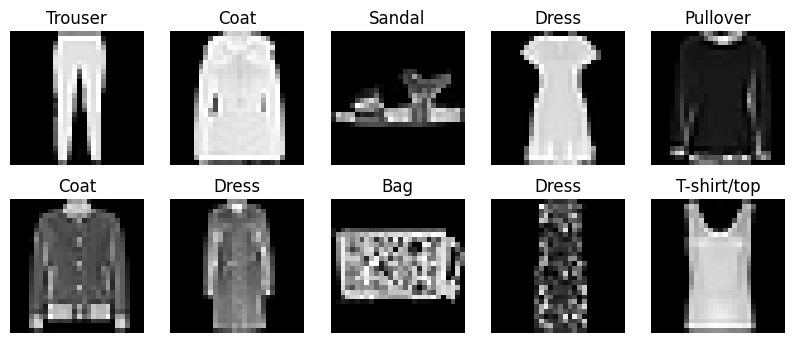

In [3]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_batch(dl):
    for images, labels in dl:
        plt.figure(figsize=(10,4))
        for i in range(10):
            plt.subplot(2, 5, i+1)
            plt.imshow(images[i][0], cmap='gray')
            plt.title(classes[labels[i]])
            plt.axis('off')
        break

show_batch(train_loader)

## Define the CNN
Architecture
- Conv(1->16, 3x3, padding=1) -> ReLU -> MaxPool(2)
- Conv(16->32, 3x3, padding=1) -> ReLU -> MaxPool(2)
- Flatten
- Linear(32 * 7 * 7 -> 128) -> ReLU -> Dropout(0.3)
- Linear(128 -> 10)
### Additional Notes
- Input is 1x28x28. After two 2x2 pools, spatial size becomes 7x7
- We'll also define a small utility to count parameters

In [5]:
import torch.nn.functional as F

class FashionCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(128, 10)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FashionCNN().to(device)
print(model)
print(f"Trainable parameters: {count_parameters(model):,}")

FashionCNN(
  (features): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out_features=128, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)
Trainable parameters: 206,922
